## Atividade 

Utilize um dos livros disponíveis no moodle ou qualquer outra obra com pelo menos umas 80 páginas para essa atividade.
* Faça o processo de pré-processamento, quebrando o texto em parágrafos ou sentenças e removendo stopwords, símbolos e pontuações (cuidado com nomes, personagens, lugares etc).
* O que a matriz de co-ocorrência pode nos revelar? Para duas, três e quatro palavras? (considere os 10 resultados mais frequentes).
* O que o modelo de regras pode nos revelar?
* O que o modelo vetorial pode nos revelar? (https://www.tensorflow.org/tutorials/text/word2vec)
* O que a PCA nos revela do modelo vetorial?
* Qual a diferença de resultado de uma clusterização de k-mens para uma clusterização db-scamem cima dos resultados do modelo vetorial?

In [2]:
# !pip install apyori
from sklearn.decomposition import PCA
from unidecode import unidecode
from apyori import apriori
import pandas as pd
import re

### Carregando o livro

In [3]:
book = 'alice_no_pais_das_maravilhas-lewis_carroll.txt'
file = open(book, "r", encoding="utf8")
text_book = file.read()

### Pré-processamento

In [4]:
text_book = unidecode(text_book)
text_book = text_book.lower()
text_book = text_book.replace('\n', ' ')

text_book_new = ""
for character in text_book:
    if character.isalnum() or character in [' ', '.', ',']:
        text_book_new += character
text_book = text_book_new        
del text_book_new

In [5]:
frases = text_book.split(sep='.')
for i in range(0,len(frases)):
  frases[i] = re.sub(r'==.*?==+', '', frases[i])

In [6]:
stop_words = [
    'houver', 'hei', 'serei', 'teremos', 'voces', 'lhe', 'estava', 'minhas', 'ja', 'este', 'nem', 'tivermos',
    'hao', 'estivessemos', 'estavam', 'houveremos', 'dela', 'nao', 'nosso', 'tenhamos', 'fui', 'houvessemos',
    'uma', 'ao', 'tivessemos', 'serao', 'ou', 'fomos', 'estao', 'teriam', 'tenha', 'nas', 'ate', 'sejamos',
    'estivermos', 'tua', 'estamos', 'seria', 'para', 'fossemos', 'com', 'ela', 'fora', 'dele', 'muito', 'teriamos',
    'de', 'seus', 'o', 'e', 'ele', 'meus', 'eramos', 'tambem', 'estejam', 'tiverem', 'no', 'nossos', 'minha',
    'mas', 'sera', 'teus', 'eram', 'nossa', 'tivesse', 'a', 'estivesse', 'nossas', 'esse', 'suas', 'aquelas',
    'sua', 'ter', 'delas', 'quando', 'houvessem', 'tive', 'em', 'das', 'estiverem', 'eu', 'estavamos', 'somos',
    'voce', 'hajam', 'teve', 'houvesse', 'mesmo', 'fosse', 'houveria', 'na', 'tivemos', 'num', 'ha', 'as',
    'estiver', 'tenham', 'deles', 'pela', 'foram', 'estiveramos', 'meu', 'foramos', 'sejam', 'terei', 'aos',
    'teria', 'ser', 'foi', 'seja', 'essas', 'tera', 'tivera', 'seriamos', 'eles', 'pelas', 'estivemos', 'vos',
    'te', 'seriam', 'da', 'esteve', 'os', 'isso', 'isto', 'aquilo', 'como', 'houve', 'havemos', 'so', 'tenho',
    'qual', 'do', 'quem', 'temos', 'elas', 'que', 'esteja', 'teu', 'fossem', 'nos', 'tinhamos', 'era', 'aquela',
    'esta', 'estivessem', 'se', 'entre', 'pelos', 'estiveram', 'houverei', 'formos', 'houvermos', 'houverao', 'essa',
    'houveriam', 'pelo', 'houveram', 'tu', 'tiver', 'houveriamos', 'esses', 'for', 'tiveramos', 'lhes', 'forem',
    'terao', 'sem', 'tinha', 'houvemos', 'aqueles', 'tiveram', 'sao', 'estivera', 'hajamos', 'estas', 'tinham',
    'houveramos', 'tuas', 'me', 'havia', 'estes', 'depois', 'estive', 'houverem', 'estejamos', 'haja', 'aquele',
    'sou', 'tem', 'tivessem', 'seu', 'mais', 'numa', 'houvera', 'seremos', 'um', 'estou', 'por', 'dos'
]

In [7]:
novasFrases = list()
for i in range(0,len(frases)):
  palavras = re.split('[^\w]',frases[i])
  nova = []
  for pal in palavras:
    lower_pal = pal.lower()
    if len(pal) < 2:
      continue
    if lower_pal in stop_words:
      continue
    nova.append(lower_pal)
  if len(nova)>1:
    novasFrases.append( nova )

## apriori

In [8]:
rules = apriori(novasFrases, min_support = 0.004, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(rules)
results = pd.DataFrame(results)

In [9]:
results.head(10)

,items,support,ordered_statistics
0,"(algum, tempo)",0.005414,"[((algum), (tempo), 0.35000000000000003, 9.051)]"
1,"(coisa, alguma)",0.008507,"[((alguma), (coisa), 0.55, 17.778750000000002)..."
2,"(alguns, minutos)",0.005414,"[((alguns), (minutos), 0.5833333333333334, 39...."
3,"(rainha, ali)",0.004640,"[((ali), (rainha), 0.2727272727272727, 4.89772..."
4,"(alta, voz)",0.008507,"[((alta), (voz), 1.0, 24.39622641509434), ((vo..."
5,"(altura, centimetros)",0.004640,"[((altura), (centimetros), 0.3157894736842105,..."
6,"(altura, meio)",0.005414,"[((altura), (meio), 0.3684210526315789, 23.818..."
7,"(voz, baixa)",0.006187,"[((baixa), (voz), 0.8, 19.516981132075472)]"
8,"(bem, ouvir)",0.005414,"[((ouvir), (bem), 0.4375, 7.07109375)]"
9,"(sei, bem)",0.005414,"[((sei), (bem), 0.25, 4.040625)]"


In [10]:
results.tail(10)

,items,support,ordered_statistics
82,"(si, mesma, disse)",0.012374,"[((mesma), (si, disse), 0.3404255319148936, 24..."
83,"(falsa, tartaruga, enquanto)",0.004640,"[((falsa, enquanto), (tartaruga), 1.0, 23.9444..."
84,"(entao, tartaruga, falsa)",0.005414,"[((entao, falsa), (tartaruga), 1.0, 23.9444444..."
85,"(tartaruga, grifo, falsa)",0.005414,"[((grifo, falsa), (tartaruga), 1.0, 23.9444444..."
86,"(mar, tartaruga, falsa)",0.005414,"[((mar), (falsa, tartaruga), 0.368421052631578..."
87,"(tartaruga, falsa, respondeu)",0.004640,"[((falsa, respondeu), (tartaruga), 1.0, 23.944..."
88,"(alta, alice, voz, disse)",0.004640,"[((alta), (alice, voz, disse), 0.5454545454545..."
89,"(tartaruga, alice, falsa, disse)",0.005414,"[((alice, falsa), (tartaruga, disse), 0.777777..."
90,"(si, alice, mesma, disse)",0.006187,"[((si), (alice, mesma, disse), 0.2162162162162..."
91,"(entao, tartaruga, falsa, disse)",0.004640,"[((entao, disse), (falsa, tartaruga), 0.230769..."


## frequencia

In [11]:
def showDic(dicio,numShow):
  freqsVal = dicio.values()
  freqs = list(freqsVal)
  freqs.sort(reverse=True)
  qdade = 0
  # lista os 10 itens mais frequentes
  for freq in freqs:
    for k,v in dicio.items():
      if v == freq:
        print(k," - ",freq)
        qdade = qdade + 1
        if qdade>=numShow:
          break
    if qdade>=numShow:
      break

In [12]:
# frequencia simples
dicio = {}
dicio2 = {}
dicio3 = {}
dicio4 = {}
for i in range(0,len(frases)):
  palavras = re.split('[^\w]',frases[i])
  nova = []
  for pal in palavras:
    lower_pal = pal.lower()
    if len(pal) < 2:
      continue
    if lower_pal in stop_words:
      continue
    # uma palavra, contagem simples e direta  
    if lower_pal in dicio:
      dicio[lower_pal] = dicio[lower_pal] + 1
    else:
      dicio[lower_pal] = 1
    nova.append( lower_pal )
  # duas palavras
  if len(nova)>1:
    for i in range(0,len(nova)-1):
      dupla = str(nova[i]) + ' ' + str(nova[i+1])
      if dupla in dicio2:
        dicio2[dupla] = dicio2[dupla] + 1
      else:
        dicio2[dupla] = 1
  # tres palavras
  if len(nova)>2:
    for i in range(0,len(nova)-2):
      tripla = str(nova[i]) + ' ' + str(nova[i+1]) + ' ' + str(nova[i+2])
      if tripla in dicio3:
        dicio3[tripla] = dicio3[tripla] + 1
      else:
        dicio3[tripla] = 1
  # quatro palavras
  if len(nova)>2:
    for i in range(0,len(nova)-3):
      quad = str(nova[i]) + ' ' + str(nova[i+1]) + ' ' + str(nova[i+2]) + ' ' + str(nova[i+3])
      if quad in dicio4:
        dicio4[quad] = dicio4[quad] + 1
      else:
        dicio4[quad] = 1

In [13]:
print("Uma palavra")
showDic(dicio,10)
print()

print("Duas palavras")
showDic(dicio2,10)
print()

print("Três palavras")
showDic(dicio3,10)
print()

print("Quatro palavras")
showDic(dicio4,10)

Uma palavra
alice  -  410
disse  -  319
entao  -  86
bem  -  81
vez  -  80
rainha  -  76
enquanto  -  69
nada  -  66
tudo  -  66
nada  -  66

Duas palavras
disse alice  -  70
falsa tartaruga  -  56
disse rei  -  33
outra vez  -  30
lebre marco  -  30
outra vez  -  30
lebre marco  -  30
si mesma  -  27
pensou alice  -  26
coelho branco  -  22

Três palavras
disse falsa tartaruga  -  18
disse si mesma  -  9
alice si mesma  -  7
disse lebre marco  -  7
alice si mesma  -  7
disse lebre marco  -  7
disse alice si  -  6
dizendo si mesma  -  5
vais entrar danca  -  5
dizendo si mesma  -  5

Quatro palavras
disse alice si mesma  -  6
vais vais vais entrar  -  4
vais vais entrar danca  -  4
vais vais vais entrar  -  4
vais vais entrar danca  -  4
disse alice voz alta  -  3
claro disse falsa tartaruga  -  3
vais entrar danca vais  -  3
entrar danca vais vais  -  3
danca vais vais vais  -  3


## word2vec

In [14]:
# ! pip install gensim
from gensim.test.utils import common_texts
from gensim.models import KeyedVectors
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np

D:\Users\brunno\AppData\Local\Programs\Python\Python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [15]:
model = Word2Vec(sentences=novasFrases, vector_size=3786, window=5, min_count=1, workers=4)
model.train(novasFrases, total_examples=len(novasFrases), epochs=10)

(124841, 135670)

In [16]:
df = pd.DataFrame(model.wv[model.wv.index_to_key])
df.index = model.wv.index_to_key

In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3776,3777,3778,3779,3780,3781,3782,3783,3784,3785
alice,0.188853,0.021072,-0.070907,-0.153382,-0.124604,0.013259,0.078814,-0.124229,-0.043951,-0.015675,...,0.030925,-0.072672,-0.145705,0.109686,-0.017121,-0.066922,-0.081192,0.073098,0.116132,-0.122969
disse,0.145671,0.016129,-0.054821,-0.118567,-0.095612,0.010519,0.060373,-0.095919,-0.033338,-0.011968,...,0.023944,-0.056241,-0.111852,0.084334,-0.013288,-0.051710,-0.062317,0.056607,0.089566,-0.095005
entao,0.129444,0.014624,-0.048745,-0.105200,-0.085051,0.008898,0.053698,-0.084924,-0.030024,-0.010862,...,0.021350,-0.050038,-0.099634,0.074637,-0.011600,-0.045894,-0.055325,0.049901,0.079297,-0.084516
bem,0.137754,0.015427,-0.051724,-0.112046,-0.090466,0.009637,0.057468,-0.091136,-0.032199,-0.011147,...,0.022960,-0.053212,-0.106266,0.079988,-0.012443,-0.049014,-0.059305,0.053454,0.085083,-0.089939
vez,0.131246,0.014131,-0.049396,-0.106631,-0.086190,0.009582,0.054193,-0.086257,-0.030424,-0.010696,...,0.021239,-0.050895,-0.100901,0.076248,-0.011903,-0.046442,-0.055878,0.050490,0.080256,-0.085078


## PCA

In [18]:
model_pca = PCA(n_components=2)
pca = model_pca.fit_transform(df)

In [19]:
pca[:10]

array([[ 4.7492933e+00, -1.3162213e-03],
       [ 3.5843518e+00,  1.2733815e-03],
       [ 3.1528766e+00, -5.8271963e-04],
       [ 3.3861287e+00,  5.1950233e-04],
       [ 3.1992183e+00, -9.5778756e-04],
       [ 3.1290014e+00,  2.8462443e-04],
       [ 3.7140260e+00, -8.6355675e-04],
       [ 2.3227930e+00,  7.3083444e-04],
       [ 3.0901420e+00, -1.2801241e-03],
       [ 2.7356343e+00, -1.8438100e-04]], dtype=float32)

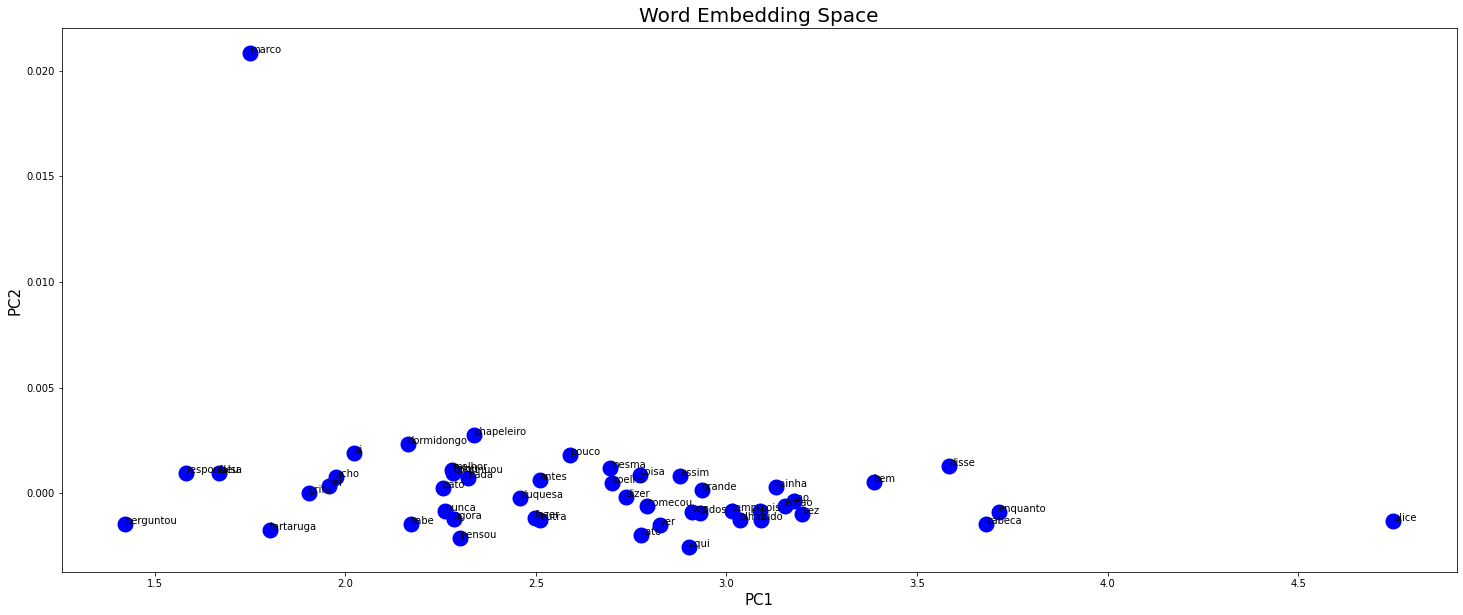

In [23]:
n_words = 50

plt.figure(figsize=(25,10))
plt.scatter(pca[:n_words,0],pca[:n_words,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.index_to_key[:n_words])
for i, word in enumerate(vocab):
  plt.annotate(word,xy=(pca[i,0],pca[i,1]))

## kmeans

In [24]:
# !pip install scikit-learn
from sklearn.cluster import KMeans

In [25]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca)
    distortions.append(kmeanModel.inertia_)

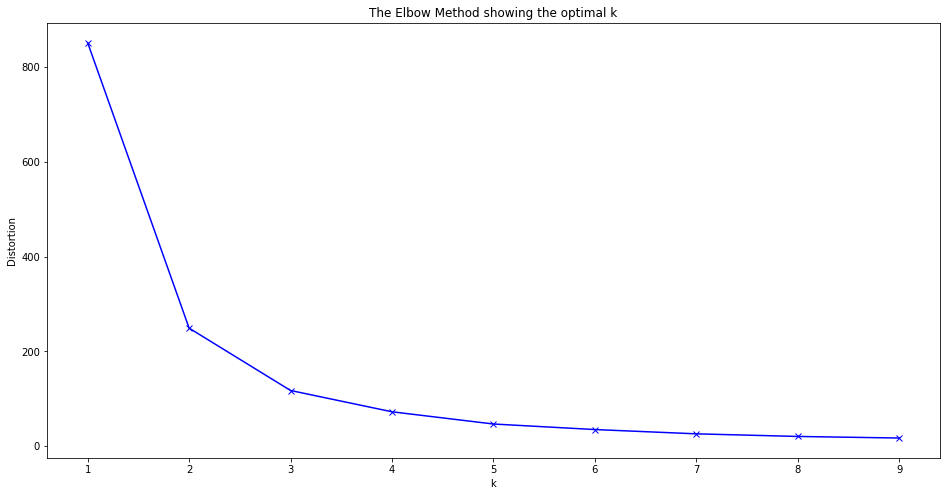

In [26]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [27]:
label = KMeans(n_clusters=3).fit_predict(pca)

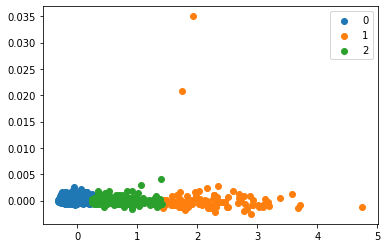

In [28]:
u_labels = np.unique(label)
 
for i in u_labels:
    plt.scatter(pca[label == i , 0] , pca[label == i , 1] , label = i)
plt.legend()
plt.show()

---

In [29]:
 from sklearn.cluster import DBSCAN

In [40]:
db = DBSCAN().fit(pca)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [41]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

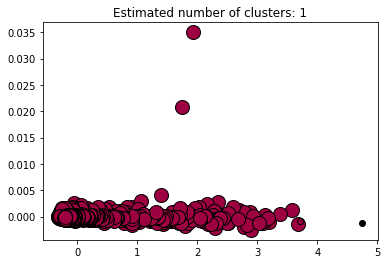

In [45]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = pca[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = pca[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### O DBSCAN NÃO GEROU NENUM CLUSTER